## Simple Keras Classification Model

In [22]:
# importing libraries

import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# read dataset using pandas as dataframe

data = pd.read_csv("sonar.csv")

In [24]:
data.head()

# All columns are numbers, except R
# We will make a function to encode R

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [25]:
# assign R to 1 and 0 to M

def assign_label_integer(row):
    if row["R"] == 'R':
        return 1
    else:
        return 0

In [26]:
# train_X the whole dataset without the R column

train_X = data.drop(["R"], axis = 1)

# apply the above function to the dataset
data["R"] = data.apply(assign_label_integer, axis = 1)

# train_y is the R column - the column to predict 
train_y = data["R"]

In [27]:
# get number of columns in training data

n_cols = train_X.shape[1]

In [28]:
# define the model

model = Sequential()

model.add(Dense(30, activation = 'relu', input_shape=(n_cols,)))

model.add(Dense(60, activation = 'relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
# fit the model

history = model.fit(train_X, train_y, epochs = 100, batch_size = 5, validation_split= 0.1, verbose = 0)


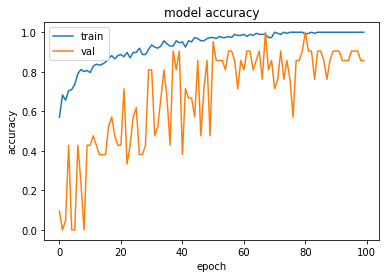

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the training accuracy and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig("legend.png")


In [31]:
# evalutate the model on the whole dataset

loss, accuracy = model.evaluate(train_X, train_y)

print('Accuracy: %.2f' % (accuracy * 100))

207/207 [==============================] - 0s 39us/step
Accuracy: 98.55


In [ ]:
# The accuracy is very high, due to the fact that we didn't evaluate the model on data it has not seen before